# Importing libraries

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb
import geopandas as gpd
import geoplot
import geoplot.crs as gcrs
import mapclassify
import numpy as np
#
import adjustText as aT

# Data Loading and Pre-processing

In [2]:
file_name =  "ERC_formatted.xlsx"

# loading DataFrames
pocet_obyvatelov = pd.read_excel(io=file_name, sheet_name=0)
# priemerna_mzda_bez_spocitanych = pd.read_excel(io=file_name, sheet_name=11)
narodeni = pd.read_excel(io=file_name, sheet_name=1)
zomreti = pd.read_excel(io=file_name, sheet_name=2)
vnutorna_migracia_pristahovani = pd.read_excel(io=file_name, sheet_name=3)
vnutorna_migracia_vystahovani = pd.read_excel(io=file_name, sheet_name=4)
zahranicna_migracia_vystahovani = pd.read_excel(io=file_name, sheet_name=5)
zahranicna_migracia_pristahovani = pd.read_excel(io=file_name, sheet_name=6)
priemerna_mzda = pd.read_excel(io=file_name, sheet_name=7)
zamestnanost = pd.read_excel(io=file_name, sheet_name=8)
pocet_gymnazii = pd.read_excel(io=file_name, sheet_name=9)
pocet_strednych_odbornych_skol = pd.read_excel(io=file_name, sheet_name=10)

# arrays of names and dataframes
dataframes = [pocet_obyvatelov, narodeni, zomreti, vnutorna_migracia_pristahovani, vnutorna_migracia_vystahovani, zahranicna_migracia_vystahovani, zahranicna_migracia_pristahovani, priemerna_mzda, zamestnanost, pocet_gymnazii, pocet_strednych_odbornych_skol]
names_of_datagrames = ["pocet_obyvatelov", "narodeni", "zomreti", "vnutorna_migracia_pristahovani", "vnutorna_migracia_vystahovani", "zahranicna_migracia_vystahovani", "zahranicna_migracia_pristahovani", "priemerna_mzda", "zamestnanost", "pocet_gymnazii", "pocet_strednych_odbornych_skol"]

# creating dictionary of dataframes for each year from 2010 to 2021
years = {}
for year in range(2010,2022):
    years[year] = pd.DataFrame(pocet_obyvatelov["Okres"])
    for i in range(len(dataframes)):
        years[year][names_of_datagrames[i]] = dataframes[i][year]


In [3]:
# check if every dataframe column "Okres" is the same in every dataframe, print only true or false
print(pocet_obyvatelov["Okres"].to_list() == narodeni["Okres"].to_list() == zomreti["Okres"].to_list() == vnutorna_migracia_pristahovani["Okres"].to_list() == vnutorna_migracia_vystahovani["Okres"].to_list() == zahranicna_migracia_vystahovani["Okres"].to_list() == zahranicna_migracia_pristahovani["Okres"].to_list() == priemerna_mzda["Okres"].to_list() == zamestnanost["Okres"].to_list() == pocet_gymnazii["Okres"].to_list() == pocet_strednych_odbornych_skol["Okres"].to_list())

True


In [4]:
def set_DPI():
    fig, ax = plt.subplots()
    fig.set_dpi(100)
    plt.grid(color = '#458EBC', linestyle = '--', linewidth = 0.5)
    ax.ticklabel_format(style='plain')

# MISC commands (debug tools)

In [5]:
# MISC getting row of Okres Bratislava I
# print(years[2010][years[2010]["Okres"] == "Okres Bratislava I"])

In [6]:
# # plotting correlation heatmap for every year
# for year in range(2010,2022):
#     correlation_matrix_data = years[year]
    
#     mask = np.triu(np.ones_like(correlation_matrix_data.corr(), dtype=bool))
#     # print(correlation_matrix_data.corr())
#     dataplot=sb.heatmap(correlation_matrix_data.corr(), annot=True, cmap="YlGnBu", mask = mask)

#     # displaying heatmaps
#     plt.show()

In [7]:
# from scipy.optimize import curve_fit

# # this is the function we want to fit
# def func(x, a, c):
#     return a*x*x + c

# p_opt, p_cov = curve_fit(func, years[YEAR][X], years[YEAR][Y])

# print(p_opt)
# a, c = p_opt
# sb.scatterplot(data=years[YEAR], x=X, y=Y) # hue="Okres"
# sb.lmplot(data=years[YEAR], x=X, y=Y, line_kws={"color": "red"})
# plt.plot(years[YEAR][X], func(years[YEAR][X], a, c), "g--", label="fit: a=%5.3f, c=%5.3f" % tuple(p_opt))


In [8]:
# def average_correlation_coefficient(X, Y):
#     sum_of_correlations = 0
#     for year in range(2010,2022):
#         sum_of_correlations += years[year][X].corr(years[year][Y])
#         print(year, ": ", years[year][X].corr(years[year][Y]))
#     print(sum_of_correlations / 12)
#     return sum_of_correlations / 12



# Average correlation heatmap

,Okres,pocet_obyvatelov,narodeni,zomreti,vnutorna_migracia_pristahovani,vnutorna_migracia_vystahovani,zahranicna_migracia_vystahovani,zahranicna_migracia_pristahovani,priemerna_mzda,zamestnanost,pocet_gymnazii,pocet_strednych_odbornych_skol
0,Okres Bratislava I,38603,444,534,1198,1078,42,270,1275,67842,5,4
1,Okres Bratislava II,108035,1447,1216,3008,2504,75,229,1327,67631,12,16
2,Okres Bratislava III,60771,768,841,1887,1489,21,179,1173,51503,3,13
3,Okres Bratislava IV,91804,1093,809,2339,2083,71,220,1061,27949,8,7
4,Okres Bratislava V,111279,1411,778,1818,3087,80,137,1073,20348,9,15


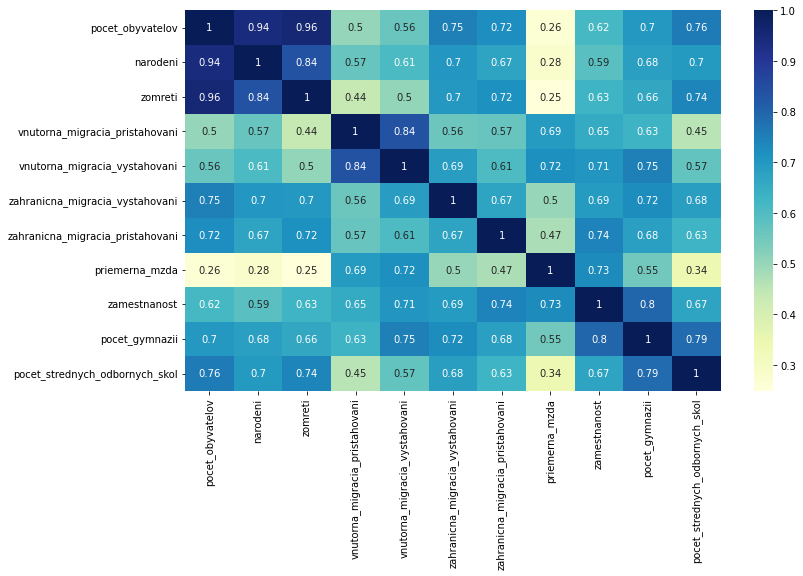

In [9]:
# sb.set(font_scale=2)
sum_of_correlations = years[2010].corr()

for year in range(2011,2022):
    sum_of_correlations += years[year].corr()

sum_of_correlations = sum_of_correlations / 12

fig, ax = plt.subplots(figsize=(12,7)) 

mask = np.triu(np.ones_like(years[2010].corr(), dtype=bool))
dataplot=sb.heatmap(sum_of_correlations, annot=True, cmap="YlGnBu", ax = ax)
plt.savefig("map.png", transparent=True, bbox_inches = 'tight', dpi=300)
# set font size generally

years[2010].head()

---

# STATISTICKE VYPOCTY DO TABULKY NA DATAFRAMES

In [130]:
# round the list
def round_list(list):
    for i in range(len(list)):
        list[i] = round(list[i])
    return list
print(round_list(priemerna_mzda.var().to_list()))

# 
"""
# priemer vsetkych okresov
print("Mean: ", priemerna_mzda.mean())

# minimum vsetkych okresov
print("Min", priemerna_mzda.min())

# maximum vsetkych okresov
print("Max", priemerna_mzda.max())

# dolny kvartil vsetkych okresov
print("Dolny kvartil",priemerna_mzda.quantile(0.25))

# horny kvartil vsetkych okresov
print("Horny kvartil", priemerna_mzda.quantile(0.75))

# median vsetkych okresov
print("median",priemerna_mzda.median())

# standardna odchylka vsetkych okresov
print("standardna odchylka",priemerna_mzda.std())

# smerodajna odchylka vsetkych okresov median aboslute devitaion
print("smerodajna odchylka",priemerna_mzda.mad())


# Rozptyl vsetkych okresov
print("Rozptyl",priemerna_mzda.var())

# koeficient kvartilovej odchýlky vsetkych okresov
print("koeficient kvartilovej odchýlky", (priemerna_mzda.quantile(0.75) - priemerna_mzda.quantile(0.25)) / (priemerna_mzda.max() - priemerna_mzda.min()))
"""

[24094, 18847, 19264, 19648, 25030, 26714, 29088, 31333, 36262, 37403, 33989, 35725]


/var/folders/82/76jnglzd3gg8l5y0pvxh5cn00000gn/T/ipykernel_73186/2802767030.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(round_list(priemerna_mzda.var().to_list()))


'\n# priemer vsetkych okresov\nprint("Mean: ", priemerna_mzda.mean())\n\n# minimum vsetkych okresov\nprint("Min", priemerna_mzda.min())\n\n# maximum vsetkych okresov\nprint("Max", priemerna_mzda.max())\n\n# dolny kvartil vsetkych okresov\nprint("Dolny kvartil",priemerna_mzda.quantile(0.25))\n\n# horny kvartil vsetkych okresov\nprint("Horny kvartil", priemerna_mzda.quantile(0.75))\n\n# median vsetkych okresov\nprint("median",priemerna_mzda.median())\n\n# standardna odchylka vsetkych okresov\nprint("standardna odchylka",priemerna_mzda.std())\n\n# smerodajna odchylka vsetkych okresov median aboslute devitaion\nprint("smerodajna odchylka",priemerna_mzda.mad())\n\n\n# Rozptyl vsetkych okresov\nprint("Rozptyl",priemerna_mzda.var())\n\n# koeficient kvartilovej odchýlky vsetkych okresov\nprint("koeficient kvartilovej odchýlky", (priemerna_mzda.quantile(0.75) - priemerna_mzda.quantile(0.25)) / (priemerna_mzda.max() - priemerna_mzda.min()))\n'

---

# Specific correlation plots

### Trh prace

In [11]:
# Zamestnanost a priemerna mzda zavislost
YEAR = 2021
year = years[YEAR]
# X = year["zamestnanost"] # / year["pocet_obyvatelov"] * 100 # FIX pocet obyvatelov
# Y = year["priemerna_mzda"]
# X = year["vnutorna_migracia_vystahovani"]
# Y = year["priemerna_mzda"]

# X = year["pocet_gymnazii"] 
X = year["pocet_strednych_odbornych_skol"] 
Y = year["zamestnanost"]

# # Migracia a zamestnanost zavislost 
# X = year["zahranicna_migracia_pristahovani"] / year["pocet_obyvatelov"] * 100
# Y = year["zamestnanost"] / year["pocet_obyvatelov"] * 100

y =  3325.18831952218 x +  2814.953681545796
Correlation coefficient:  0.6662693149833105


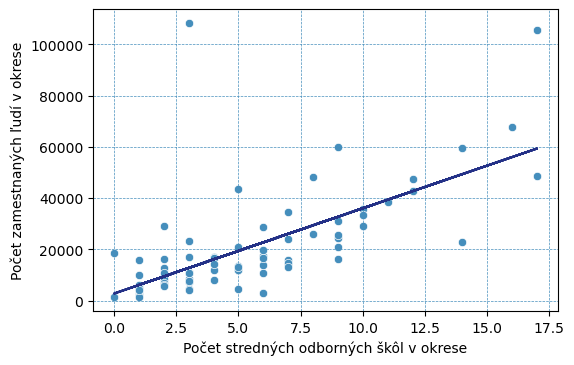

In [12]:
# SIMPLE PLOT OF X AND Y
set_DPI()
fig = sb.scatterplot(x=X, y=Y, color="#458EBC") # hue=year["pocet_gymnazii"]/year["pocet_obyvatelov"]

# fig = sb.regplot(x=X, y=Y, color="#458EBC")
# fig.set_xlabel("Pomer zamestnaných ľudí na počet obyvateľov v okrese (%)")
fig.set_xlabel("Počet stredných odborných škôl v okrese")
fig.set_ylabel("Počet zamestnaných ľudí v okrese")
# sb font scael


# fig.set_xlabel("vnitorna migracia pristahovany v okrese")
# fig.set_ylabel("priemerna mzda v okrese (€)")

m, b = np.polyfit(X, Y, 1)
plt.plot(X, m*X + b, color="#243187")
# print math model of the plot
print("y = ", m, "x + ", b)

# plt.xticks(np.arange(min(X)-2.5, max(X), 25))

# correltion coefficient of X and Y
plt.savefig("pocet-SOŠ-zamestnanost-zavislost.png", transparent=True, dpi=300, bbox_inches = 'tight')
print("Correlation coefficient: ", X.corr(Y))
# AVERAGE CORRELATION
# summ = 0
# for i in range(2010,2022):
#     one = years[i]["zamestnanost"] / years[i]["pocet_obyvatelov"] * 100
#     two = years[i]["priemerna_mzda"]
#     print(i, ": ", one.corr(two))
#     summ += one.corr(two)
# print("Average: ", summ/12) 


<AxesSubplot:xlabel='pocet_strednych_odbornych_skol', ylabel='zamestnanost'>

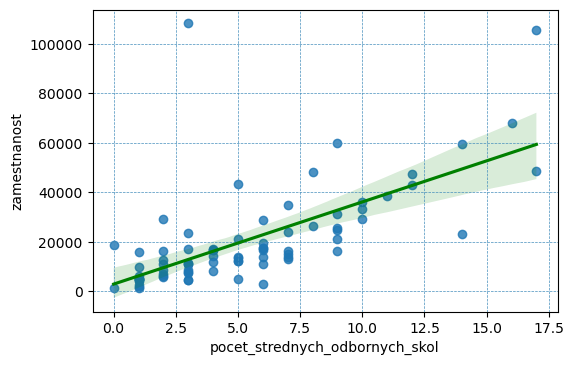

In [13]:
# LINEAR REGRESSION FITED TO PLOT OF X AND Y
set_DPI()
sb.regplot(x=X, y=Y, line_kws={"color": "green"}) # hue="Okres"

### Populacia

### Vzdelanie

In [14]:
# X = year["zamestnanost"] / year["pocet_obyvatelov"] * 100
# Y = year["pocet_gymnazii"] /year["pocet_obyvatelov"]

# Graphs in time

### Trh prace

Prediction for 2030:  1656.915892124729


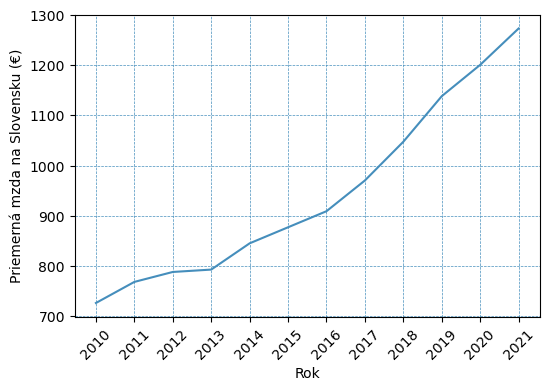

Prediction for 2030:  36.77147728105774
[23.379779788244516, 23.918245433932324, 24.156415016089934, 24.069078198483773, 25.185668733003542, 25.988582911372344, 26.74392398051052, 27.604333543996823, 29.13740057878098, 30.20936910770918, 29.59834987071663, 29.972811806770995]


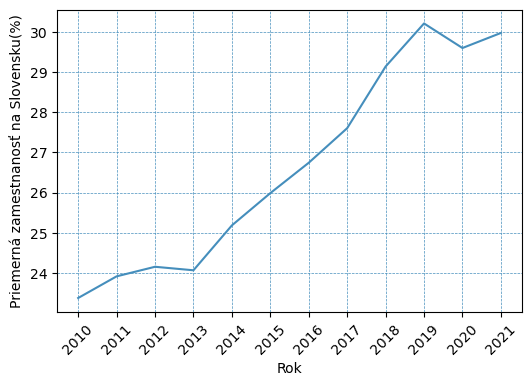

In [15]:
set_DPI()
years_range = range(2010,2022)

# kazdy okres samostatne
# for i in range(len(priemerna_mzda)):
#     fig = sb.lineplot(x=years_range, y=priemerna_mzda.iloc[i][1:])

# priemerna mzda vsetkych okresov
fig = sb.lineplot(x=years_range, y=priemerna_mzda.drop(columns=["Okres"]).mean(), color="#458EBC")

fig.set_xlabel('Rok')
fig.set_ylabel('Priemerná mzda na Slovensku (€)')
plt.xticks(np.arange(2010, 2022, 1.0), rotation=45)
# make a predition for x=2030 year from list y=priemerna_mzda.drop(columns=["Okres"]).mean() and x=years_range
print("Prediction for 2030: ", np.polyfit(years_range, priemerna_mzda.drop(columns=["Okres"]).mean(), 1)[0]*2030 + np.polyfit(years_range, priemerna_mzda.drop(columns=["Okres"]).mean(), 1)[1])

plt.savefig("priemerna_mzda_v_case.png", transparent=True, dpi=300)
plt.show()

set_DPI()
# percento zamestnanych vsetkych okresov v case
priemerna_zamestnanost = []
for year in range(2010,2022):
    priemerna_zamestnanost.append(sum(years[year]["zamestnanost"]) / sum(years[year]["pocet_obyvatelov"]) * 100)
fig = sb.lineplot(x=years_range, y=priemerna_zamestnanost, color="#458EBC")
fig.set_xlabel('Rok')
fig.set_ylabel('Priemerná zamestnanosť na Slovensku(%)')
plt.xticks(np.arange(2010, 2022, 1.0), rotation=45)
# make a predition for x=2030 year from list y=priemerna_zamestnanost and x=years_range
print("Prediction for 2030: ", np.polyfit(years_range, priemerna_zamestnanost, 1)[0]*2030 + np.polyfit(years_range, priemerna_zamestnanost, 1)[1])
print(priemerna_zamestnanost)
plt.savefig("priemerna_zamestnanost_v_case.png", transparent=True, dpi=300)

### Populacia

#### Pocet obyvatelov

Prediction for 2030:  5501775.9592074575 year coeficient 5054.129370629232


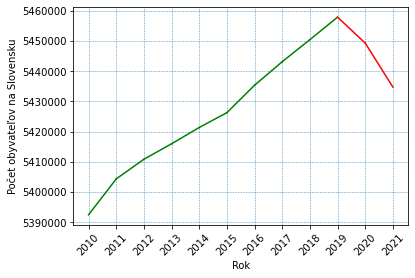

In [16]:
years_range = range(2010,2022)

pocet_obyvatelov_total = []
for year in range(2010,2022):
    pocet_obyvatelov_total.append(sum(years[year]["pocet_obyvatelov"]))
fig, ax = plt.subplots()

for x1, x2, y1,y2 in zip(years_range, years_range[1:], pocet_obyvatelov_total, pocet_obyvatelov_total[1:]):
    if y1 > y2:
        plt.plot([x1, x2], [y1, y2], 'r')
    elif y1 < y2:
        plt.plot([x1, x2], [y1, y2], 'g')
    else:
        plt.plot([x1, x2], [y1, y2], 'b')

plt.xlabel("Rok")
plt.ylabel("Počet obyvateľov na Slovensku")
plt.xticks(np.arange(2010, 2022, 1.0), rotation=45)
plt.grid(color = '#458EBC', linestyle = '--', linewidth = 0.5)
ax.ticklabel_format(style='plain')

# make a predition for x=2030 year from list y=pocet_obyvatelov_total and x=years_range
print("Prediction for 2030: ", np.polyfit(years_range, pocet_obyvatelov_total, 1)[0]*2030 + np.polyfit(years_range, pocet_obyvatelov_total, 1)[1],"year coeficient" , np.polyfit(years_range, pocet_obyvatelov_total, 1)[0])


plt.savefig("pocet_obyvatelov_cas.png", transparent=True, dpi=300, bbox_inches = 'tight')

#### Umrtnost %

[0.9911086731327491, 0.9603979925696507, 0.9691108730702611, 0.9617705041166377, 0.9471074450289033, 0.9919554049461765, 0.9631590867402481, 0.9904980966798455, 0.9961248864995933, 0.9753616472937351, 1.0843470776819648, 1.351699961285897]
Prediction for 2030:  59416.13636363624


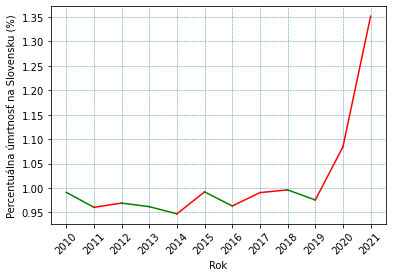

In [17]:
years_range = range(2010,2022)

# percento zamestnanych vsetkych okresov v case
umrtnost_na_pocet_obyvatelov_total = []
zomreti_total = []
for year in range(2010,2022):
    umrtnost_na_pocet_obyvatelov_total.append((sum(years[year]["zomreti"])/sum(years[year]["pocet_obyvatelov"])) * 100)
    zomreti_total.append(sum(years[year]["zomreti"]))
fig, ax = plt.subplots()

for x1, x2, y1,y2 in zip(years_range, years_range[1:], umrtnost_na_pocet_obyvatelov_total, umrtnost_na_pocet_obyvatelov_total[1:]):
    if y1 > y2:
        plt.plot([x1, x2], [y1, y2], 'g')
    elif y1 < y2:
        plt.plot([x1, x2], [y1, y2], 'r')
    else:
        plt.plot([x1, x2], [y1, y2], 'b')
print(umrtnost_na_pocet_obyvatelov_total)
plt.xlabel("Rok")
plt.ylabel("Percentuálna úmrtnosť na Slovensku (%)")
plt.xticks(np.arange(2010, 2022, 1.0), rotation=45)
plt.grid(color = '#458EBC', linestyle = '--', linewidth = 0.5)
ax.ticklabel_format(style='plain')
# make a predition for x=2030 year from list y=zomreti_total and x=years_range (not the umrtnost_na_pocet_obyvatelov_total)
# print(zomreti_total)
# print(zomreti_total[:-2])
print("Prediction for 2030: ", np.polyfit(years_range[:-1], zomreti_total[:-1], 1)[0]*2030 + np.polyfit(years_range[:-1], zomreti_total[:-1], 1)[1])

plt.savefig("umrtnost_na_pocet_obyvatelov_cas.png", transparent=True, dpi=300, bbox_inches = 'tight')

#### Narodenie %

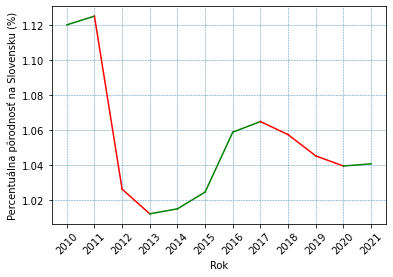

In [18]:
years_range = range(2010,2022)

# percento zamestnanych vsetkych okresov v case
narodenie_na_pocet_obyvatelov_total = []
for year in range(2010,2022):
    narodenie_na_pocet_obyvatelov_total.append((sum(years[year]["narodeni"])/sum(years[year]["pocet_obyvatelov"])) * 100)
fig, ax = plt.subplots()

for x1, x2, y1,y2 in zip(years_range, years_range[1:], narodenie_na_pocet_obyvatelov_total, narodenie_na_pocet_obyvatelov_total[1:]):
    if y1 > y2:
        plt.plot([x1, x2], [y1, y2], 'r')
    elif y1 < y2:
        plt.plot([x1, x2], [y1, y2], 'g')
    else:
        plt.plot([x1, x2], [y1, y2], 'b')

plt.xlabel("Rok")
plt.ylabel("Percentuálna pôrodnosť na Slovensku (%)")
plt.xticks(np.arange(2010, 2022, 1.0), rotation=45)
plt.grid(color = '#458EBC', linestyle = '--', linewidth = 0.5)
ax.ticklabel_format(style='plain')

plt.savefig("porodnost_na_pocet_obyvatelov_cas.png", transparent=True, dpi=300, bbox_inches = 'tight')

### Migracia

Prediction for 2030:  59535.15034965053


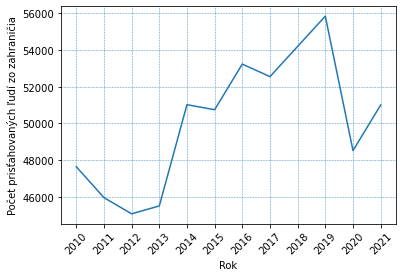

In [19]:
years_range = range(2010,2022)

# percento zamestnanych vsetkych okresov v case
migracia = []
for year in range(2010,2022):
    migracia.append(sum(years[year]["vnutorna_migracia_pristahovani"]))
    # print(sum(years[year]["vnutorna_migracia_vystahovani"]) == sum(years[year]["vnutorna_migracia_pristahovani"]) )
sb.lineplot(x=years_range, y=migracia)
    # fig, ax = plt.subplots()

# for x1, x2, y1,y2 in zip(years_range, years_range[1:], migracia, migracia[1:]):
#     if y1 > y2:
#         plt.plot([x1, x2], [y1, y2], 'r')
#     elif y1 < y2:
#         plt.plot([x1, x2], [y1, y2], 'g')
#     else:
#         plt.plot([x1, x2], [y1, y2], 'b')

plt.xlabel("Rok")
plt.ylabel("Počet prisťahovaných ľudí zo zahraničia")
plt.xticks(np.arange(2010, 2022, 1.0), rotation=45)
plt.grid(color = '#458EBC', linestyle = '--', linewidth = 0.5)
ax.ticklabel_format(style='plain')
# make a prediction where x=2030 year, and y = migracia and x=years_range
print("Prediction for 2030: ", np.polyfit(years_range, migracia, 1)[0]*2030 + np.polyfit(years_range, migracia, 1)[1])

# plt.savefig("celkova_zahranicna_pristahovanost_obyvatelov_cas.png", transparent=True, dpi=300, bbox_inches = 'tight')

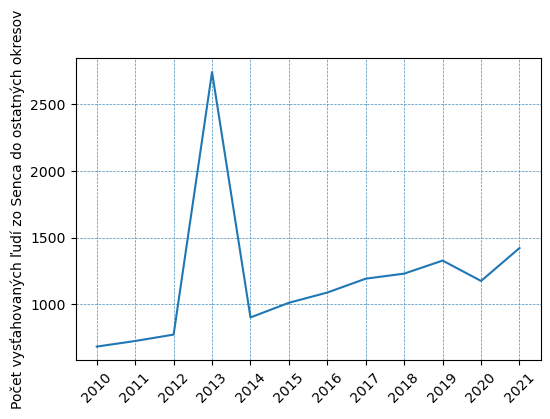

In [41]:
set_DPI()
sb.lineplot(x=years_range, y=vnutorna_migracia_vystahovani[vnutorna_migracia_vystahovani["Okres"] == "Okres Senec"].iloc[0].to_list()[1:])

plt.ylabel("Počet vysťahovaných ľudí zo Senca do ostatných okresov")
plt.xticks(np.arange(2010, 2022, 1.0), rotation=45)
plt.grid(color = '#458EBC', linestyle = '--', linewidth = 0.5)

plt.savefig("vnutorna_vystahovanost_obyvatelov_senec_cas.png", transparent=True, dpi=300, bbox_inches = 'tight')

# Heatmap of Slovak districts

,REF,TXT,geometry
0,SK0221,Okres Bánovce nad Bebravou,"POLYGON ((17.99821 48.72281, 17.99716 48.72845..."
1,SK0321,Okres Banská Bystrica,"POLYGON ((18.99112 48.80609, 18.99221 48.81087..."
2,SK0322,Okres Banská Štiavnica,"POLYGON ((18.75064 48.41116, 18.75472 48.41284..."
3,SK0411,Okres Bardejov,"POLYGON ((20.98654 49.30662, 20.98736 49.30825..."
4,SK0101,Okres Bratislava I,"POLYGON ((17.07345 48.17451, 17.07748 48.17197..."


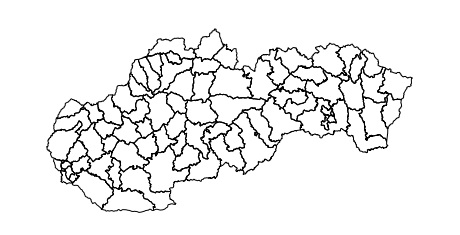

In [21]:
map = gpd.read_file("okresy.json")
geoplot.polyplot(map, projection=gcrs.AlbersEqualArea())

map["TXT"] = map["TXT"].str.replace("okres", "Okres")

# map.apply(lambda x: plt.annotate(text=map["TXT"], xy=(x.geometry.centroid.coords[0]), ha='center'), axis=1)

# map["center"] = map["geometry"].centroid
# map_points = map.copy()
# map_points.set_geometry("center", inplace = True)



# map.plot(figsize = (15, 12), color = "whitesmoke", edgecolor = "lightgrey", linewidth = 0.5)
# texts = []

# for x, y, label in zip(map_points.geometry.x, map_points.geometry.y, map_points["TXT"]):
    # texts.append(plt.text(x, y, label[5:], fontsize = 8))
    
    # print(x, y, label[5:])
    # xtran = gcrs.ccrs.AlbersEqualArea()
    # x, y = xtran.transform_point(map_points.geometry.x, map_points.geometry.y, gcrs.PlateCarree())
    # plt.annotate(label[5:], xy=(x, y))
    # plt.annotate(label[5:], xy=(x, y), xytext=(x, y + 0.1), fontsize = 8, ha = "center", va = "center")


# aT.adjust_text(texts, force_points=0.3, force_text=0.8, expand_points=(1,1), expand_text=(1,1), 
#                arrowprops=dict(arrowstyle="-", color='grey', lw=0.5))

map.head()

### Mzda

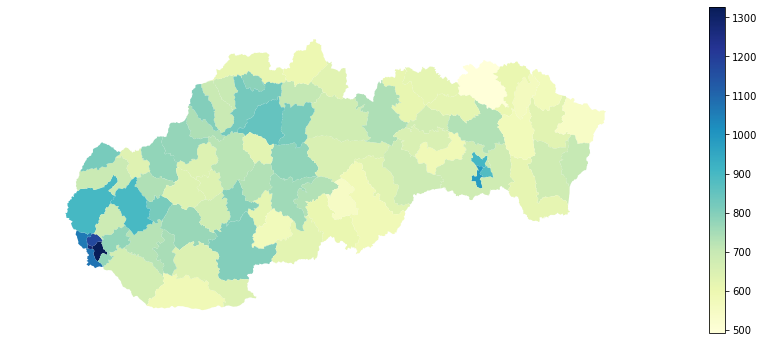

In [22]:
# make heatmap_data array from dataframe column "priemerna_mzda" in years[2021] dataframe, but index it by "Okres" column which is same as map["TXT"] column
YEAR = 2010
heatmap_data = []
for okres_name in map["TXT"]:
    heatmap_data.append(years[YEAR].loc[years[YEAR]["Okres"] == okres_name]["priemerna_mzda"].values[0])

# scheme = mapclassify.Quantiles(heatmap_data, k=10)

geoplot.choropleth(
    map, hue=heatmap_data, cmap="YlGnBu", figsize=(15, 6), projection=gcrs.AlbersEqualArea(), legend=True
)

plt.savefig("map-mzda-2010.png", transparent=True, dpi=300, bbox_inches = 'tight')
# years[2021].head(10)

### Populacia

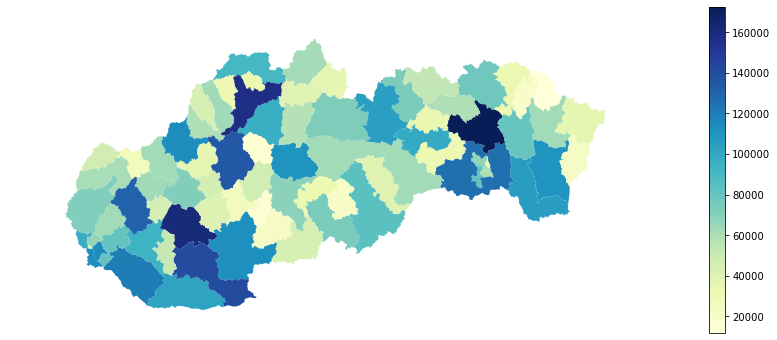

In [23]:
heatmap_data = []
for okres_name in map["TXT"]:
    sum_calculation = 0
    for year in range(2010,2022):
        pocet_obyvarelov_v_okrese = years[year].loc[years[year]["Okres"] == okres_name]["pocet_obyvatelov"].values[0]
        # print(okres_name, year, pocet_skol_v_okrese)
        sum_calculation += pocet_obyvarelov_v_okrese
        # sum_calculation += pocet_skol_v_okrese
    # print(okres_name, sum_calculation/12)
    heatmap_data.append(sum_calculation/12)
# scheme = mapclassify.Quantiles(heatmap_data, k=10)

geoplot.choropleth(
    map, hue=heatmap_data, cmap="YlGnBu", figsize=(15, 6), projection=gcrs.AlbersEqualArea(), legend=True
)

plt.savefig("pocet-obyvatelov-mapka.png", transparent=True, dpi=300, bbox_inches = 'tight')

### Umrtnost

Okres Bánovce nad Bebravou 1.029840438105313
Okres Banská Bystrica 0.9551875853111197
Okres Banská Štiavnica 1.1940831563906829
Okres Bardejov 0.8935368626663625
Okres Bratislava I 1.269605440544
Okres Bratislava II 1.1212802259276302
Okres Bratislava III 1.1859554042082308
Okres Bratislava IV 0.8835640746881639
Okres Bratislava V 0.769967815330916
Okres Brezno 1.1981340213093226
Okres Bytča 1.0341962132611269
Okres Čadca 1.0655676381670085
Okres Detva 1.155941951015375
Okres Dolný Kubín 0.8857462704588261
Okres Dunajská Streda 1.0249628803287045
Okres Galanta 1.0972077974595864
Okres Gelnica 1.0742378395872911
Okres Hlohovec 1.0357052564298683
Okres Humenné 0.9834256022427885
Okres Ilava 1.0394599246385303
Okres Kežmarok 0.74607607161678
Okres Komárno 1.2560457549570614
Okres Košice I 0.9599909896052418
Okres Košice II 0.8348048255104498
Okres Košice III 0.6949441545718082
Okres Košice IV 1.083151437731053
Okres Košice - okolie 0.9066300962896908
Okres Krupina 1.2205325683858923
Okres

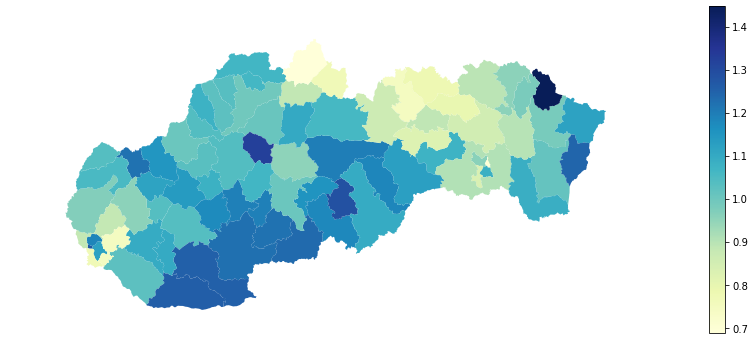

In [24]:
# YEAR = 2021
# heatmap_data = []
# for okres_name in map["TXT"]:
#     zomreti = years[YEAR].loc[years[YEAR]["Okres"] == okres_name]["zomreti"].values[0]
#     pocet_obyvatelov = years[YEAR].loc[years[YEAR]["Okres"] == okres_name]["pocet_obyvatelov"].values[0]
#     heatmap_data.append(zomreti/pocet_obyvatelov*100)

heatmap_data = []

for okres_name in map["TXT"]:
    sum_calculation = 0
    for year in range(2010,2022):
        zomreti_mapa = years[year].loc[years[year]["Okres"] == okres_name]["zomreti"].values[0]
        pocet_obyvatelov_mapa = years[year].loc[years[year]["Okres"] == okres_name]["pocet_obyvatelov"].values[0]
        sum_calculation += zomreti_mapa/pocet_obyvatelov_mapa*100
    heatmap_data.append(sum_calculation/12)
    print(okres_name, sum_calculation/12)
# scheme = mapclassify.Quantiles(heatmap_data, k=10)
# print(max(heatmap_data), min(heatmap_data))
geoplot.choropleth(
    map, hue=heatmap_data, cmap="YlGnBu", figsize=(15, 6), projection=gcrs.AlbersEqualArea(), legend=True, 
)

plt.savefig("umrtnost-mapka-average.png", transparent=True, dpi=300, bbox_inches = 'tight')
# years[2021].head(10)

### Narodenost

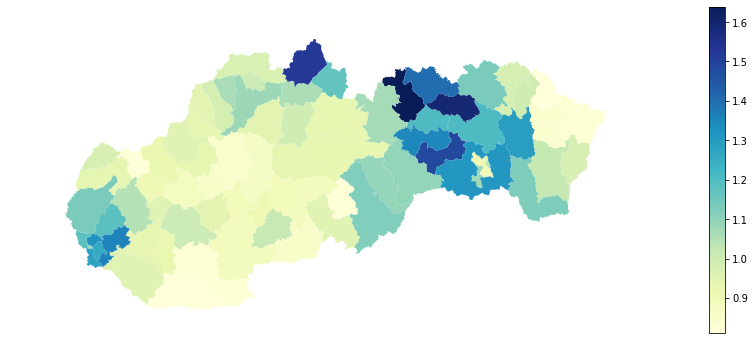

In [25]:
# YEAR = 2010
# heatmap_data = []
# for okres_name in map["TXT"]:
#     narodeni = years[YEAR].loc[years[YEAR]["Okres"] == okres_name]["narodeni"].values[0]
#     pocet_obyvatelov = years[YEAR].loc[years[YEAR]["Okres"] == okres_name]["pocet_obyvatelov"].values[0]
#     heatmap_data.append(narodeni/pocet_obyvatelov*100)

# map["center"] = map["geometry"].centroid
# map_points = map.copy()
# map_points.set_geometry("center", inplace = True)


heatmap_data = []
for okres_name in map["TXT"]:
    sum_calculation = 0
    for year in range(2010,2022):
        narodeni_mapa = years[year].loc[years[year]["Okres"] == okres_name]["narodeni"].values[0]
        pocet_obyvatelov_mapa = years[year].loc[years[year]["Okres"] == okres_name]["pocet_obyvatelov"].values[0]
        sum_calculation += narodeni_mapa/pocet_obyvatelov_mapa*100
    heatmap_data.append(sum_calculation/12)

# scheme = mapclassify.Quantiles(heatmap_data, k=10)

geoplot.choropleth(
    map, hue=heatmap_data, cmap="YlGnBu", figsize=(15, 6), projection=gcrs.AlbersEqualArea(), legend=True
)

# for x, y, label in zip(map_points.geometry.x, map_points.geometry.y, map_points["TXT"]):      # ANNOTATING LON AND LAT NOT X Y
#     plt.annotate(label[5:], xy=(x, y))

plt.savefig("narodenost-mapka-average.png", transparent=True, dpi=300, bbox_inches = 'tight')

### Migracia

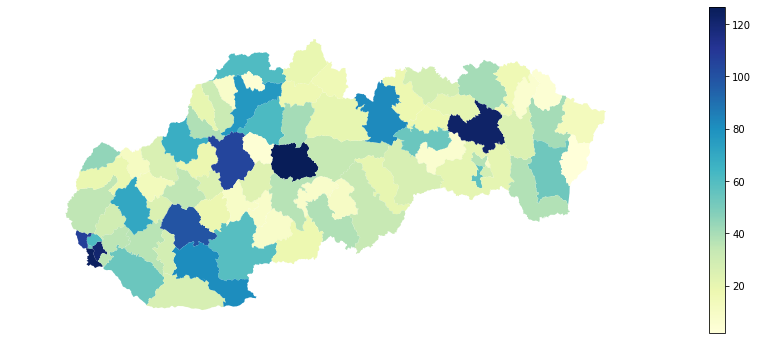

In [26]:
heatmap_data = []
for okres_name in map["TXT"]:
    sum_calculation = 0
    for year in range(2010,2022):
        sum_calculation += years[year].loc[years[year]["Okres"] == okres_name]["zahranicna_migracia_vystahovani"].values[0]
    # print(okres_name, sum_calculation/12)
    heatmap_data.append(sum_calculation/12)
# scheme = mapclassify.Quantiles(heatmap_data, k=10)

geoplot.choropleth(
    map, hue=heatmap_data, cmap="YlGnBu", figsize=(15, 6), projection=gcrs.AlbersEqualArea(), legend=True
)

plt.savefig("zahranicne-vystahovanie-mapka.png", transparent=True, dpi=300, bbox_inches = 'tight')

### Vzdelanie

Okres Bánovce nad Bebravou 0.007513324527616807
Okres Banská Bystrica 0.01416593211897506
Okres Banská Štiavnica 0.03754631473136811
Okres Bardejov 0.011503116020017233
Okres Bratislava I 0.023959339924509243
Okres Bratislava II 0.025441594975007083
Okres Bratislava III 0.020372635831239248
Okres Bratislava IV 0.01264192477370335
Okres Bratislava V 0.019873886951524436
Okres Brezno 0.011118893586657996
Okres Bytča 0.006494114115133748
Okres Čadca 0.008838414697423295
Okres Detva 0.00619975881602982
Okres Dolný Kubín 0.02072038781050802
Okres Dunajská Streda 0.01451721960149408
Okres Galanta 0.009574562165466064
Okres Gelnica 0.006332231841717343
Okres Hlohovec 0.009035518893529559
Okres Humenné 0.015821282950120814
Okres Ilava 0.009493671827222466
Okres Kežmarok 0.01004480668298752
Okres Komárno 0.010965946708427363
Okres Košice I 0.03046251876810054
Okres Košice II 0.008939681802812866
Okres Košice III 0.009094275988257112
Okres Košice IV 0.03053356100999032
Okres Košice - okolie 0.00

<GeoAxesSubplot:>

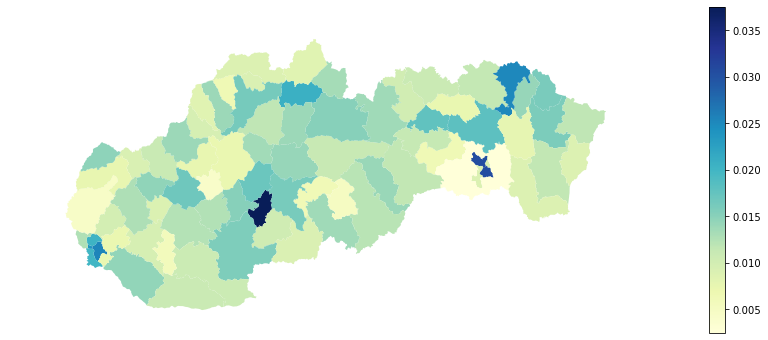

In [132]:
heatmap_data = []
for okres_name in map["TXT"]:
    sum_calculation = 0
    for year in range(2010,2022):
        pocet_skol_v_okrese = years[year].loc[years[year]["Okres"] == okres_name]["pocet_gymnazii"].values[0] + years[year].loc[years[year]["Okres"] == okres_name]["pocet_strednych_odbornych_skol"].values[0]
        pocet_obyvarelov_v_okrese = years[year].loc[years[year]["Okres"] == okres_name]["pocet_obyvatelov"].values[0]
        
        sum_calculation += pocet_skol_v_okrese/pocet_obyvarelov_v_okrese*100
        # sum_calculation += pocet_skol_v_okrese
    # print(okres_name, sum_calculation/12)
    print(okres_name, sum_calculation/12)
    heatmap_data.append(sum_calculation/12)
# scheme = mapclassify.Quantiles(heatmap_data, k=10)

geoplot.choropleth(
    map, hue=heatmap_data, cmap="YlGnBu", figsize=(15, 6), projection=gcrs.AlbersEqualArea(), legend=True
)

# plt.savefig("pocet-skol-mapka.png", transparent=True, dpi=300, bbox_inches = 'tight')

## Histograms

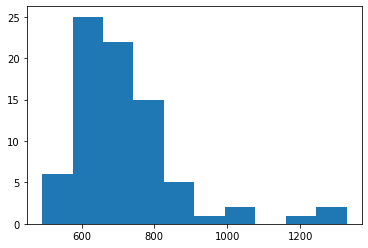

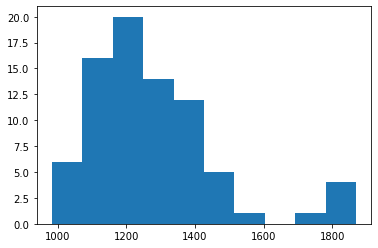

In [28]:
plt.hist(years[2010]["priemerna_mzda"])
plt.show()
plt.hist(years[2021]["priemerna_mzda"])
plt.show()

# Stacked area chart

### Population

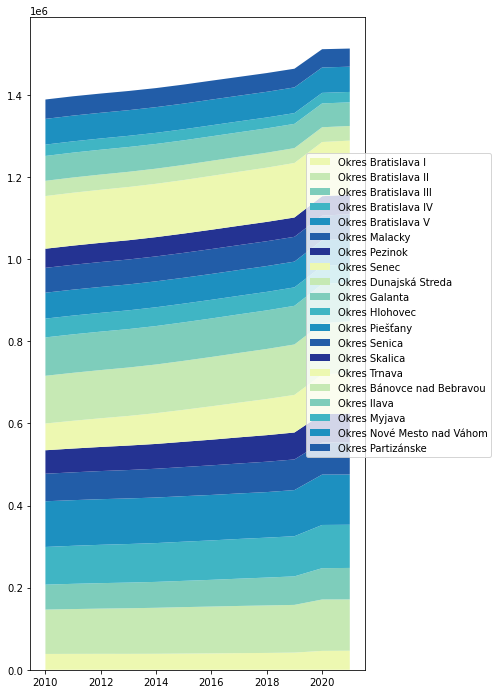

In [29]:
# set_DPI()
okresyy = []
for i in range(20):
    okresyy.append(pocet_obyvatelov.iloc[i][1:].to_list())
# make the fig size bigger of subplots
fig, ax = plt.subplots(figsize=(6, 12))
colors = sb.color_palette("YlGnBu", 7)
plt.stackplot(years_range, okresyy, labels=pocet_obyvatelov["Okres"].to_list()[:20], colors=colors)
plt.legend(loc = "upper center", bbox_to_anchor=(1.1, 0.8), ncol=1)
plt.show()

# Anomalies

In [30]:
# yyy = pd.DataFrame()
# for y in range(2010,2022):
    # yyy[years[2010].iloc[47][1:].keys().to_list()[y - 2011]] = years[y].iloc[47][1:].to_list()
# print(yyy)

# print(yyy.corr())
# .corr()
# dataplot=sb.heatmap(sum_of_correlations, annot=True, cmap="YlGnBu", ax = ax)

In [31]:
# find Presov okres in dataframe and get row
# print(years[2010].iloc[47])
yy = pd.DataFrame(years[2010].columns)
# print(yy)
# yy = pd.DataFrame("pocet_obyvatelov": {}, "narodeni": {}, "zomreti": {}, "vnutorna_migracia_pristahovani": {}, vnutorna_migracia_vystahovani )
# years[2010].iloc[47].drop("Okres")

# df.append({'Name':'Jane', 'Age':25, 'Location':'Madrid'}, 

<AxesSubplot:>

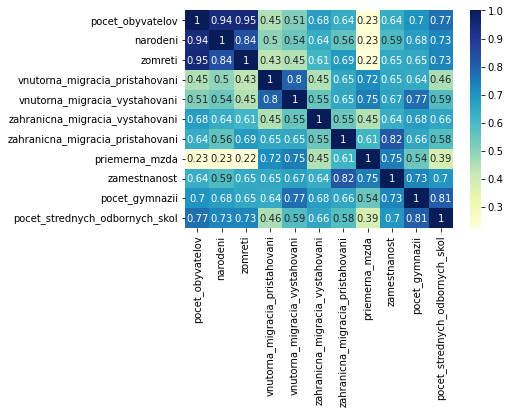

In [32]:
sb.heatmap(years[2010].corr(), annot=True, cmap="YlGnBu")

# Bar charts

### Vzdelanie

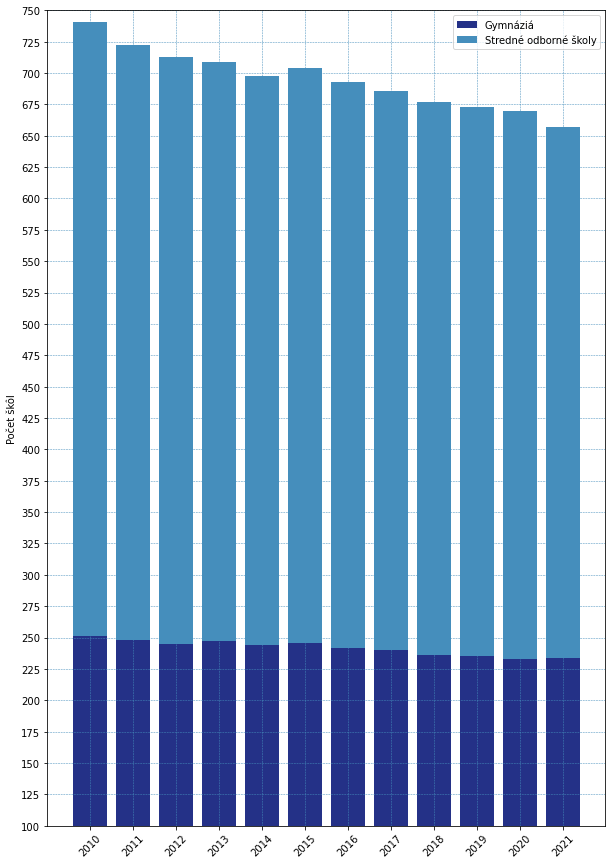

In [33]:
# set_DPI()
fig = plt.figure(figsize=(10, 15))
# plt.plot(x, y)
# plt.show()

years_range = list(range(2010,2022))
gymn = []
sos = []

for year in years_range:
    gymn.append(sum(pocet_gymnazii[year]))
    sos.append(sum(pocet_strednych_odbornych_skol[year]))

X_axis = np.arange(len(years_range))
plt.bar(X_axis, gymn, label = 'Gymnáziá', color='#243187')
plt.bar(X_axis, sos, bottom=gymn, label = 'Stredné odborné školy', color='#458EBC')

# plt.bar(X_axis - 0.2, gymn, 0.4, label = 'Gymnáziá')
# plt.bar(X_axis + 0.2, sos, 0.4, label = 'Stredné odborné školy')

plt.xticks(X_axis, years_range, rotation=45)
plt.yticks(np.arange(0, 800, 25))
# plt.xlabel("Rok")
plt.ylabel("Počet škôl")
plt.grid(color = '#458EBC', linestyle = '--', linewidth = 0.5)
ax.ticklabel_format(style='plain')
plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(100, 750)

plt.show()
fig.savefig("pocet-skol-bar-casovy.png", transparent=True, dpi=300, bbox_inches = 'tight')


### Migracia

{'Okres Senec': 1840, 'Okres Bratislava II': 846, 'Okres Košice - okolie': 643, 'Okres Malacky': 565, 'Okres Pezinok': 519, 'Okres Bratislava III': 516, 'Okres Dunajská Streda': 435, 'Okres Bratislava IV': 382, 'Okres Trnava': 174, 'Okres Žilina': 165, 'Okres Nitra': 137, 'Okres Trenčín': 112, 'Okres Bratislava I': 111, 'Okres Prešov': 102, 'Okres Senica': 74, 'Okres Piešťany': 73, 'Okres Galanta': 57, 'Okres Košice IV': 42, 'Okres Turčianske Teplice': 13, 'Okres Liptovský Mikuláš': 7, 'Okres Zlaté Moravce': 7, 'Okres Nové Mesto nad Váhom': 4, 'Okres Skalica': 3, 'Okres Detva': 2, 'Okres Bytča': 1, 'Okres Topoľčany': 1, 'Okres Sobrance': 0, 'Okres Komárno': -4, 'Okres Medzilaborce': -10, 'Okres Zvolen': -13, 'Okres Poltár': -19, 'Okres Banská Štiavnica': -22, 'Okres Trebišov': -33, 'Okres Žarnovica': -38, 'Okres Lučenec': -59, 'Okres Poprad': -61, 'Okres Stropkov': -62, 'Okres Ilava': -66, 'Okres Veľký Krtíš': -67, 'Okres Rožňava': -68, 'Okres Partizánske': -69, 'Okres Sabinov': -71, '

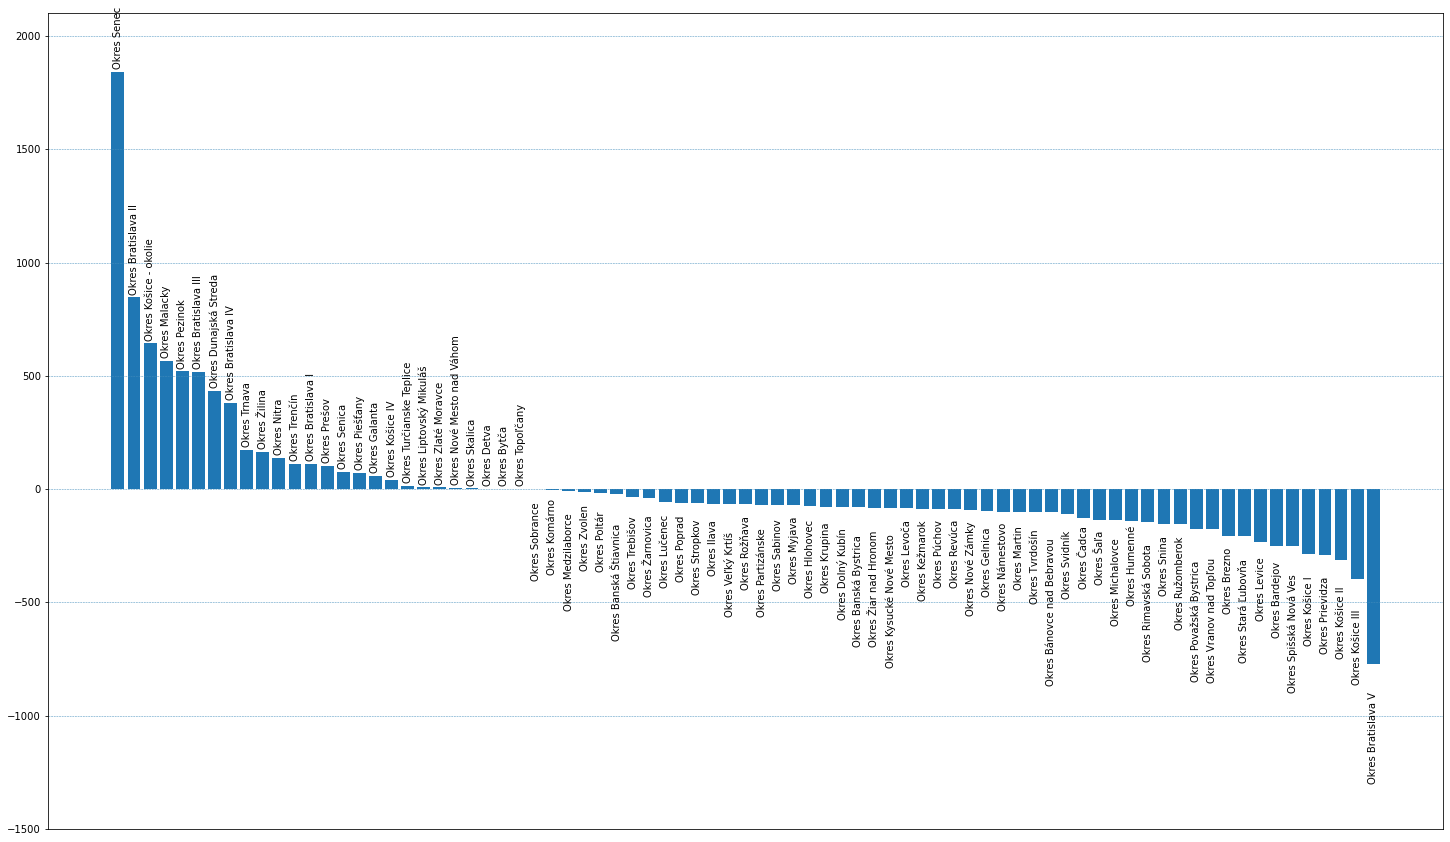

'\nX_axis = np.arange(len(years_range))\nplt.bar(X_axis, gymn, label = \'Gymnáziá\', color=\'#243187\')\nplt.bar(X_axis, sos, bottom=gymn, label = \'Stredné odborné školy\', color=\'#458EBC\')\n\n# plt.bar(X_axis - 0.2, gymn, 0.4, label = \'Gymnáziá\')\n# plt.bar(X_axis + 0.2, sos, 0.4, label = \'Stredné odborné školy\')\n\nplt.xticks(X_axis, years_range, rotation=45)\nplt.yticks(np.arange(0, 800, 25))\n# plt.xlabel("Rok")\nplt.ylabel("Počet škôl")\nplt.grid(color = \'#458EBC\', linestyle = \'--\', linewidth = 0.5)\nax.ticklabel_format(style=\'plain\')\nplt.legend(bbox_to_anchor=(1, 1))\nplt.ylim(100, 750)\n\nplt.show()\nfig.savefig("pocet-skol-bar-casovy.png", transparent=True, dpi=300, bbox_inches = \'tight\')\n'

In [116]:
# set_DPI()
fig = plt.figure(figsize=(25, 15))
# plt.plot(x, y)
# plt.show()
dicti = {}
for i in range(79):
    # if (years[2013]["vnutorna_migracia_pristahovani"][i] > years[2013]["vnutorna_migracia_vystahovani"][i]):
    #     print(years[2013]["Okres"][i], years[2013]["vnutorna_migracia_pristahovani"][i] / years[2013]["vnutorna_migracia_vystahovani"][i])
    # else:
    #     print(years[2013]["Okres"][i] + " -" + str(years[2013]["vnutorna_migracia_vystahovani"][i] / years[2013]["vnutorna_migracia_pristahovani"][i]))
    # print(years[2013]["Okres"][i], years[2013]["vnutorna_migracia_pristahovani"][i] - years[2013]["vnutorna_migracia_vystahovani"][i])
    dicti[years[2012]["Okres"][i]] = years[2012]["vnutorna_migracia_pristahovani"][i] - years[2012]["vnutorna_migracia_vystahovani"][i]

dicti = {k: v for k, v in reversed(sorted(dicti.items(), key=lambda item: item[1]))}
plt.xticks(rotation=90)
print(dicti)
ax.annotate("Presov", xy=(0, 0), xytext=(0, 0), color='red')
plt.grid(color = '#458EBC', linestyle = '--', linewidth = 0.5)
pps = plt.bar(list(dicti.keys()), list(dicti.values()))
for p in pps:
    height = p.get_height()  
    # get index of p in pps
    i = pps.index(p)
    if (height > 0):
        plt.annotate(list(dicti.keys())[i],
            xy=(p.get_x() + p.get_width() / 2, height),
            xytext=(0, 3), # 3 points vertical offset
            textcoords="offset points",
            rotation=90,
        ha='center', va='bottom')
    else:
        plt.annotate(list(dicti.keys())[i],
            xy=(p.get_x() + p.get_width() / 2, height - len(str(list(dicti.keys())[i]))*30),
            xytext=(0, 3), # 3 points vertical offset
            textcoords="offset points",
            rotation=90,
        ha='center', va='bottom')
plt.ylim(-1500, 2100)
plt.xticks(np.arange(2000, -800, 100))
plt.show()

fig.savefig("anomalie-velky-bar.png", transparent=True, dpi=300, bbox_inches = 'tight')

"""
X_axis = np.arange(len(years_range))
plt.bar(X_axis, gymn, label = 'Gymnáziá', color='#243187')
plt.bar(X_axis, sos, bottom=gymn, label = 'Stredné odborné školy', color='#458EBC')

# plt.bar(X_axis - 0.2, gymn, 0.4, label = 'Gymnáziá')
# plt.bar(X_axis + 0.2, sos, 0.4, label = 'Stredné odborné školy')

plt.xticks(X_axis, years_range, rotation=45)
plt.yticks(np.arange(0, 800, 25))
# plt.xlabel("Rok")
plt.ylabel("Počet škôl")
plt.grid(color = '#458EBC', linestyle = '--', linewidth = 0.5)
ax.ticklabel_format(style='plain')
plt.legend(bbox_to_anchor=(1, 1))
plt.ylim(100, 750)

plt.show()
fig.savefig("pocet-skol-bar-casovy.png", transparent=True, dpi=300, bbox_inches = 'tight')
"""

# TABLES

In [34]:
"""
fig, ax = plt.subplots()

# fig.size
# hide axes
fig.patch.set_visible(False)
ax.axis('off')
ax.axis('tight')
fig.set_dpi(300)
"""

dataframee = priemerna_mzda

priemerne_hodnoty = {}
for i in range(len(priemerna_mzda)):
    priemerne_hodnoty[dataframee.iloc[i]["Okres"]] = sum(dataframee.iloc[i].iloc[1:].to_list())/12
# priemerne_hodnoty.sort(key=lambda x: x[1], reverse=True)
priemerne_hodnoty = {k: v for k, v in sorted(priemerne_hodnoty.items(), key=lambda item: item[1])}
priemerne_hodnoty = dict(reversed(list(priemerne_hodnoty.items())))

# print top 5
print(list(priemerne_hodnoty.items())[:5])

"""
df = pd.DataFrame(columns=["Najvyššie", "Najnižšie"])
df["Najvyššie"] = years[2010].iloc[47][1:].to_list()
df["Najnižšie"] = years[2021].iloc[47][1:].to_list()
ax.table(cellText=df.values, colLabels=df.columns, loc='center')

fig.tight_layout()
# fig.suptitle("Table")
plt.show()
"""

[('Okres Bratislava II', 1498.75), ('Okres Bratislava I', 1464.5833333333333), ('Okres Bratislava IV', 1428.3333333333333), ('Okres Bratislava III', 1375.6666666666667), ('Okres Bratislava V', 1332.8333333333333)]


'\ndf = pd.DataFrame(columns=["Najvyššie", "Najnižšie"])\ndf["Najvyššie"] = years[2010].iloc[47][1:].to_list()\ndf["Najnižšie"] = years[2021].iloc[47][1:].to_list()\nax.table(cellText=df.values, colLabels=df.columns, loc=\'center\')\n\nfig.tight_layout()\n# fig.suptitle("Table")\nplt.show()\n'

# Predictions

### Vzdelanie prediction 

In [35]:
pocet_gymnaziii = []
for year in range(2010,2022):
    pocet_gymnazii.append(sum(years[year]["pocet_gymnazii"]))
sb.lineplot(x=years_range, y=pocet_gymnazii)
print("Prediction for 2030: ", np.polyfit(years_range, pocet_gymnazii, 1)[0]*2030 + np.polyfit(years_range, pocet_gymnazii, 1)[1])

TypeError: cannot concatenate object of type '<class 'int'>'; only Series and DataFrame objs are valid

Prediction for 2030:  381.70979020978666


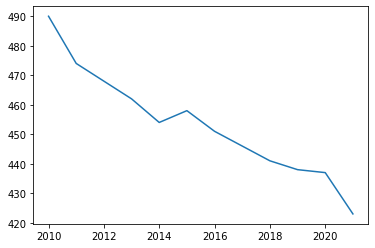

In [ ]:
pocet_strednych_odbornych_skoll = []
for year in range(2010,2022):
    pocet_strednych_odbornych_skoll.append(sum(years[year]["pocet_strednych_odbornych_skol"]))
sb.lineplot(x=years_range, y=pocet_strednych_odbornych_skoll)
print("Prediction for 2030: ", np.polyfit(years_range, pocet_strednych_odbornych_skoll, 1)[0]*2030 + np.polyfit(years_range, pocet_strednych_odbornych_skoll, 1)[1])

### Populacia prediction

### Mzda prediction

In [ ]:
presov = priemerna_mzda[priemerna_mzda["Okres"] == "Okres Prešov"].iloc[0].to_list()[1:]

bratislava_I = priemerna_mzda[priemerna_mzda["Okres"] == "Okres Bratislava I"].iloc[0].to_list()[1:]
bratislava_II = priemerna_mzda[priemerna_mzda["Okres"] == "Okres Bratislava II"].iloc[0].to_list()[1:]
bratislava_III = priemerna_mzda[priemerna_mzda["Okres"] == "Okres Bratislava III"].iloc[0].to_list()[1:]
bratislava_IV = priemerna_mzda[priemerna_mzda["Okres"] == "Okres Bratislava IV"].iloc[0].to_list()[1:]
bratislava_V = priemerna_mzda[priemerna_mzda["Okres"] == "Okres Bratislava V"].iloc[0].to_list()[1:]

# make a predition where x=2030 year, and y = every list bratislava and x=years_range, also include name of the list in print
print("Prediction for 2030 Bratislava I: ", np.polyfit(years_range, bratislava_I, 1)[0]*2030 + np.polyfit(years_range, bratislava_I, 1)[1])
print("Prediction for 2030 Bratislava II: ", np.polyfit(years_range, bratislava_II, 1)[0]*2030 + np.polyfit(years_range, bratislava_II, 1)[1])
print("Prediction for 2030 Bratislava III: ", np.polyfit(years_range, bratislava_III, 1)[0]*2030 + np.polyfit(years_range, bratislava_III, 1)[1])
print("Prediction for 2030 Bratislava IV: ", np.polyfit(years_range, bratislava_IV, 1)[0]*2030 + np.polyfit(years_range, bratislava_IV, 1)[1])
print("Prediction for 2030 Bratislava V: ", np.polyfit(years_range, bratislava_V, 1)[0]*2030 + np.polyfit(years_range, bratislava_V, 1)[1])

bardejov = priemerna_mzda[priemerna_mzda["Okres"] == "Okres Bardejov"].iloc[0].to_list()[1:]
# make a prediction where x=2030 year, and y = medzilaborcee and x=years_range
print("Prediction for 2030 Bardejov: ", np.polyfit(years_range, bardejov, 1)[0]*2030 + np.polyfit(years_range, bardejov, 1)[1])

snina = priemerna_mzda[priemerna_mzda["Okres"] == "Okres Snina"].iloc[0].to_list()[1:]
# make a prediction where x=2030 year, and y = snina and x=years_range
print("Prediction for 2030 Snina: ", np.polyfit(years_range, snina, 1)[0]*2030 + np.polyfit(years_range, snina, 1)[1])

velky_krtis = priemerna_mzda[priemerna_mzda["Okres"] == "Okres Veľký Krtíš"].iloc[0].to_list()[1:]
# make a prediction where x=2030 year, and y = velky_krtis and x=years_range
print("Prediction for 2030 Veľký Krtíš: ", np.polyfit(years_range, velky_krtis, 1)[0]*2030 + np.polyfit(years_range, velky_krtis, 1)[1])



# make a prediction where x=2030 year, and y = presov and x=years_range
print("Prediction for 2030 Prešov: ", np.polyfit(years_range, presov, 1)[0]*2030 + np.polyfit(years_range, presov, 1)[1])



Prediction for 2030 Bratislava I:  2328.2459207458887
Prediction for 2030 Bratislava II:  2334.8321678321226
Prediction for 2030 Bratislava III:  2182.4953379953367
Prediction for 2030 Bratislava IV:  2570.79137529133
Prediction for 2030 Bratislava V:  2334.1445221445174
Prediction for 2030 Bardejov:  1262.3228438228107
Prediction for 2030 Snina:  1318.7692307692196
Prediction for 2030 Veľký Krtíš:  1311.305361305349
Prediction for 2030 Prešov:  1572.0804195804376


### Vzdelanie predictoin

In [ ]:
a = pocet_gymnazii[pocet_gymnazii["Okres"] == "Okres Prešov"].iloc[0].to_list()[1:]
b = pocet_strednych_odbornych_skol[pocet_strednych_odbornych_skol["Okres"] == "Okres Prešov"].iloc[0].to_list()[1:]
spolu_skoly_presov = []
for i in range(len(a)):
    spolu_skoly_presov.append(a[i] + b[i])

# make a prediction where x=2030 year, and y = spolu_skoly_presov and x=years_range
print("Prediction for 2030 Prešov: ", np.polyfit(years_range, spolu_skoly_presov, 1)[0]*2030 + np.polyfit(years_range, spolu_skoly_presov, 1)[1])

a = pocet_gymnazii[pocet_gymnazii["Okres"] == "Okres Bratislava II"].iloc[0].to_list()[1:]
b = pocet_strednych_odbornych_skol[pocet_strednych_odbornych_skol["Okres"] == "Okres Bratislava II"].iloc[0].to_list()[1:]
spolu_skoly_ba = []
for i in range(len(a)):
    spolu_skoly_ba.append(a[i] + b[i])

# make a prediction where x=2030 year, and y = spolu_skoly_presov and x=years_range
print("Prediction for 2030 Bratislava II: ", np.polyfit(years_range, spolu_skoly_ba, 1)[0]*2030 + np.polyfit(years_range, spolu_skoly_ba, 1)[1])

Prediction for 2030 Prešov:  21.6025641025642
Prediction for 2030 Bratislava II:  28.829836829837
